In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style='darkgrid')
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [2]:
df = pd.read_csv("/Users/maryrivera/Downloads/Edinburgh Listing Data.csv")
df.shape

(6161, 74)

In [3]:
df2 = pd.read_csv("/Users/maryrivera/Downloads/Edinburgh Summary Listing Data.csv")
df2.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,15420,Georgian Boutique Apt City Centre,60423,Charlotte,NaN,"Old Town, Princes Street and Leith Street",55.95759,-3.18805,Entire home/apt,90,3,391,2022-03-13,2.88,1,205,51,NaN
1,24288,"Cool central Loft, sleeps 4, 2 double bed+en-s...",46498,Gordon,NaN,"Canongate, Southside and Dumbiedykes",55.94383,-3.18445,Entire home/apt,95,3,228,2021-08-25,1.63,1,17,11,NaN
2,38628,Edinburgh Holiday Let,165635,Trish,NaN,Joppa,55.94215,-3.09640,Entire home/apt,52,4,60,2022-03-13,0.64,2,243,4,NaN
3,44552,Double room - spacious Leith flat,195950,Shaun,NaN,South Leith,55.96612,-3.17184,Private room,37,2,216,2022-02-28,1.53,2,43,17,NaN
4,54188,The Four Sisters Boatel,253850,Natalie,NaN,Dalry and Fountainbridge,55.94217,-3.20863,Entire home/apt,164,1,37,2021-11-02,0.32,2,226,3,NaN


In [4]:
df2.drop(['id','host_name','neighbourhood_group','last_review','license'],axis=1,inplace=True)
df2.head()

,name,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,Georgian Boutique Apt City Centre,60423,"Old Town, Princes Street and Leith Street",55.95759,-3.18805,Entire home/apt,90,3,391,2.88,1,205,51
1,"Cool central Loft, sleeps 4, 2 double bed+en-s...",46498,"Canongate, Southside and Dumbiedykes",55.94383,-3.18445,Entire home/apt,95,3,228,1.63,1,17,11
2,Edinburgh Holiday Let,165635,Joppa,55.94215,-3.09640,Entire home/apt,52,4,60,0.64,2,243,4
3,Double room - spacious Leith flat,195950,South Leith,55.96612,-3.17184,Private room,37,2,216,1.53,2,43,17
4,The Four Sisters Boatel,253850,Dalry and Fountainbridge,55.94217,-3.20863,Entire home/apt,164,1,37,0.32,2,226,3


In [9]:
df2['reviews_per_month'].fillna(0,inplace=True)

In [10]:
df2.isnull().sum()

name                              0
host_id                           0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

## Top 10 hosts in terms of listing count

In [11]:
top_host_id = df2['host_id'].value_counts().head(10)
top_host_id

37563463     112
646220        46
402191311     41
21906467      35
132693648     31
60190971      30
19173145      30
3008499       29
201600360     28
87762710      25
Name: host_id, dtype: int64

[Text(0, 0, '37563463'),
 Text(1, 0, '646220'),
 Text(2, 0, '402191311'),
 Text(3, 0, '21906467'),
 Text(4, 0, '132693648'),
 Text(5, 0, '60190971'),
 Text(6, 0, '19173145'),
 Text(7, 0, '3008499'),
 Text(8, 0, '201600360'),
 Text(9, 0, '87762710')]

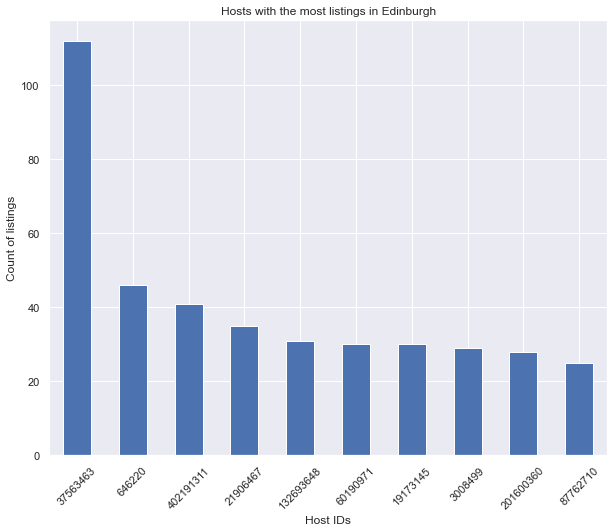

In [12]:
sns.set(rc={'figure.figsize':(10,8)})
viz_bar = top_host_id.plot(kind='bar')
viz_bar.set_title('Hosts with the most listings in Edinburgh')
viz_bar.set_xlabel('Host IDs')
viz_bar.set_ylabel('Count of listings')
viz_bar.set_xticklabels(viz_bar.get_xticklabels(), rotation=45)

## Getting the Top Edinburgh Neighbourhoods

In [13]:
df2.neighbourhood.value_counts().index

Index(['Old Town, Princes Street and Leith Street', 'Deans Village',
       'Tollcross', 'Hillside and Calton Hill', 'New Town West',
       'Dalry and Fountainbridge', 'Canongate, Southside and Dumbiedykes',
       'Meadows and Southside', 'New Town East and Gayfield', 'Stockbridge',
       ...
       'East Craigs North', 'Murrayburn and Wester Hailes North',
       'Baberton and Juniper Green', 'Mountcastle',
       'Granton South and Wardieburn', 'Carrick Knowe',
       'Barnton, Cammo and Cramond South', 'Currie East', 'Fairmilehead',
       'Mortonhall and Anwickhill'],
      dtype='object', length=111)

In [14]:
df2.neighbourhood.value_counts(normalize=True)

Old Town, Princes Street and Leith Street    0.125142
Deans Village                                0.059731
Tollcross                                    0.050803
Hillside and Calton Hill                     0.037819
New Town West                                0.036358
                                               ...   
Carrick Knowe                                0.000812
Barnton, Cammo and Cramond South             0.000649
Currie East                                  0.000649
Fairmilehead                                 0.000487
Mortonhall and Anwickhill                    0.000487
Name: neighbourhood, Length: 111, dtype: float64

In [15]:
df2.neighbourhood.value_counts(normalize=True)[:10].sum().round(2)

0.46

In [16]:
top10neighbourhoods = list(df2.neighbourhood.value_counts(normalize=True)[:10].index)
top10neighbourhoods

['Old Town, Princes Street and Leith Street',
 'Deans Village',
 'Tollcross',
 'Hillside and Calton Hill',
 'New Town West',
 'Dalry and Fountainbridge',
 'Canongate, Southside and Dumbiedykes',
 'Meadows and Southside',
 'New Town East and Gayfield',
 'Stockbridge']

In [17]:
df2.neighbourhood = [x if x in top10neighbourhoods else 'Others' for x in   
                       df2.neighbourhood]
df2.neighbourhood.value_counts(normalize=True)

Others                                       0.539036
Old Town, Princes Street and Leith Street    0.125142
Deans Village                                0.059731
Tollcross                                    0.050803
Hillside and Calton Hill                     0.037819
New Town West                                0.036358
Dalry and Fountainbridge                     0.036033
Canongate, Southside and Dumbiedykes         0.033274
Meadows and Southside                        0.030839
New Town East and Gayfield                   0.026781
Stockbridge                                  0.024184
Name: neighbourhood, dtype: float64

## Top Neighbourhood Areas

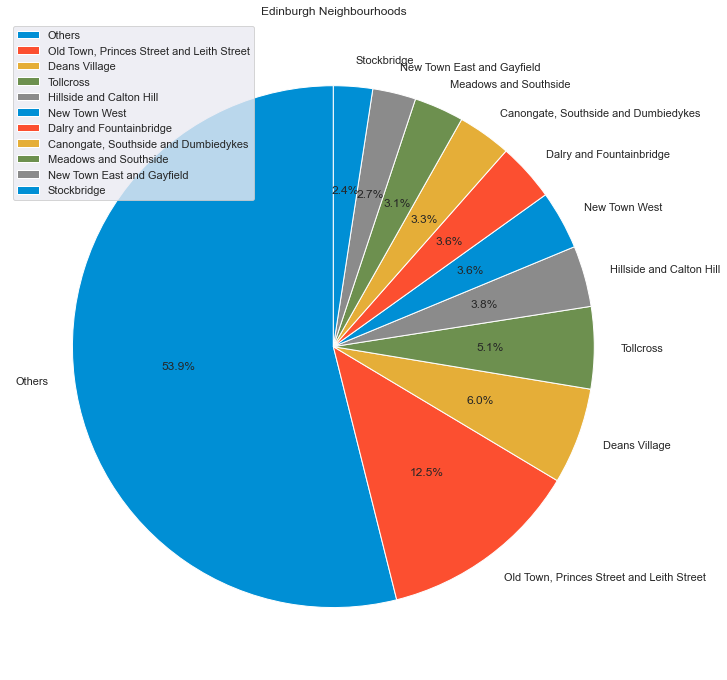

In [18]:
mylabels = df2.neighbourhood.value_counts().index
mycolors = ['#008fd5','#fc4f30','#e5ae38','#6d904f','#8b8b8b']
shape = df2.neighbourhood.value_counts().values
plt.figure(figsize=(12,12))
plt.pie(shape,labels=mylabels,colors=mycolors, autopct = '%1.1f%%', startangle=90)
plt.legend()
plt.title('Edinburgh Neighbourhoods')
plt.show()

In [19]:
df2.price.describe()

count     6161.000000
mean       148.234540
std        466.300052
min          0.000000
25%         60.000000
50%         90.000000
75%        137.000000
max      18825.000000
Name: price, dtype: float64

In [20]:
pricesIQR = df2[df2.price < 137]

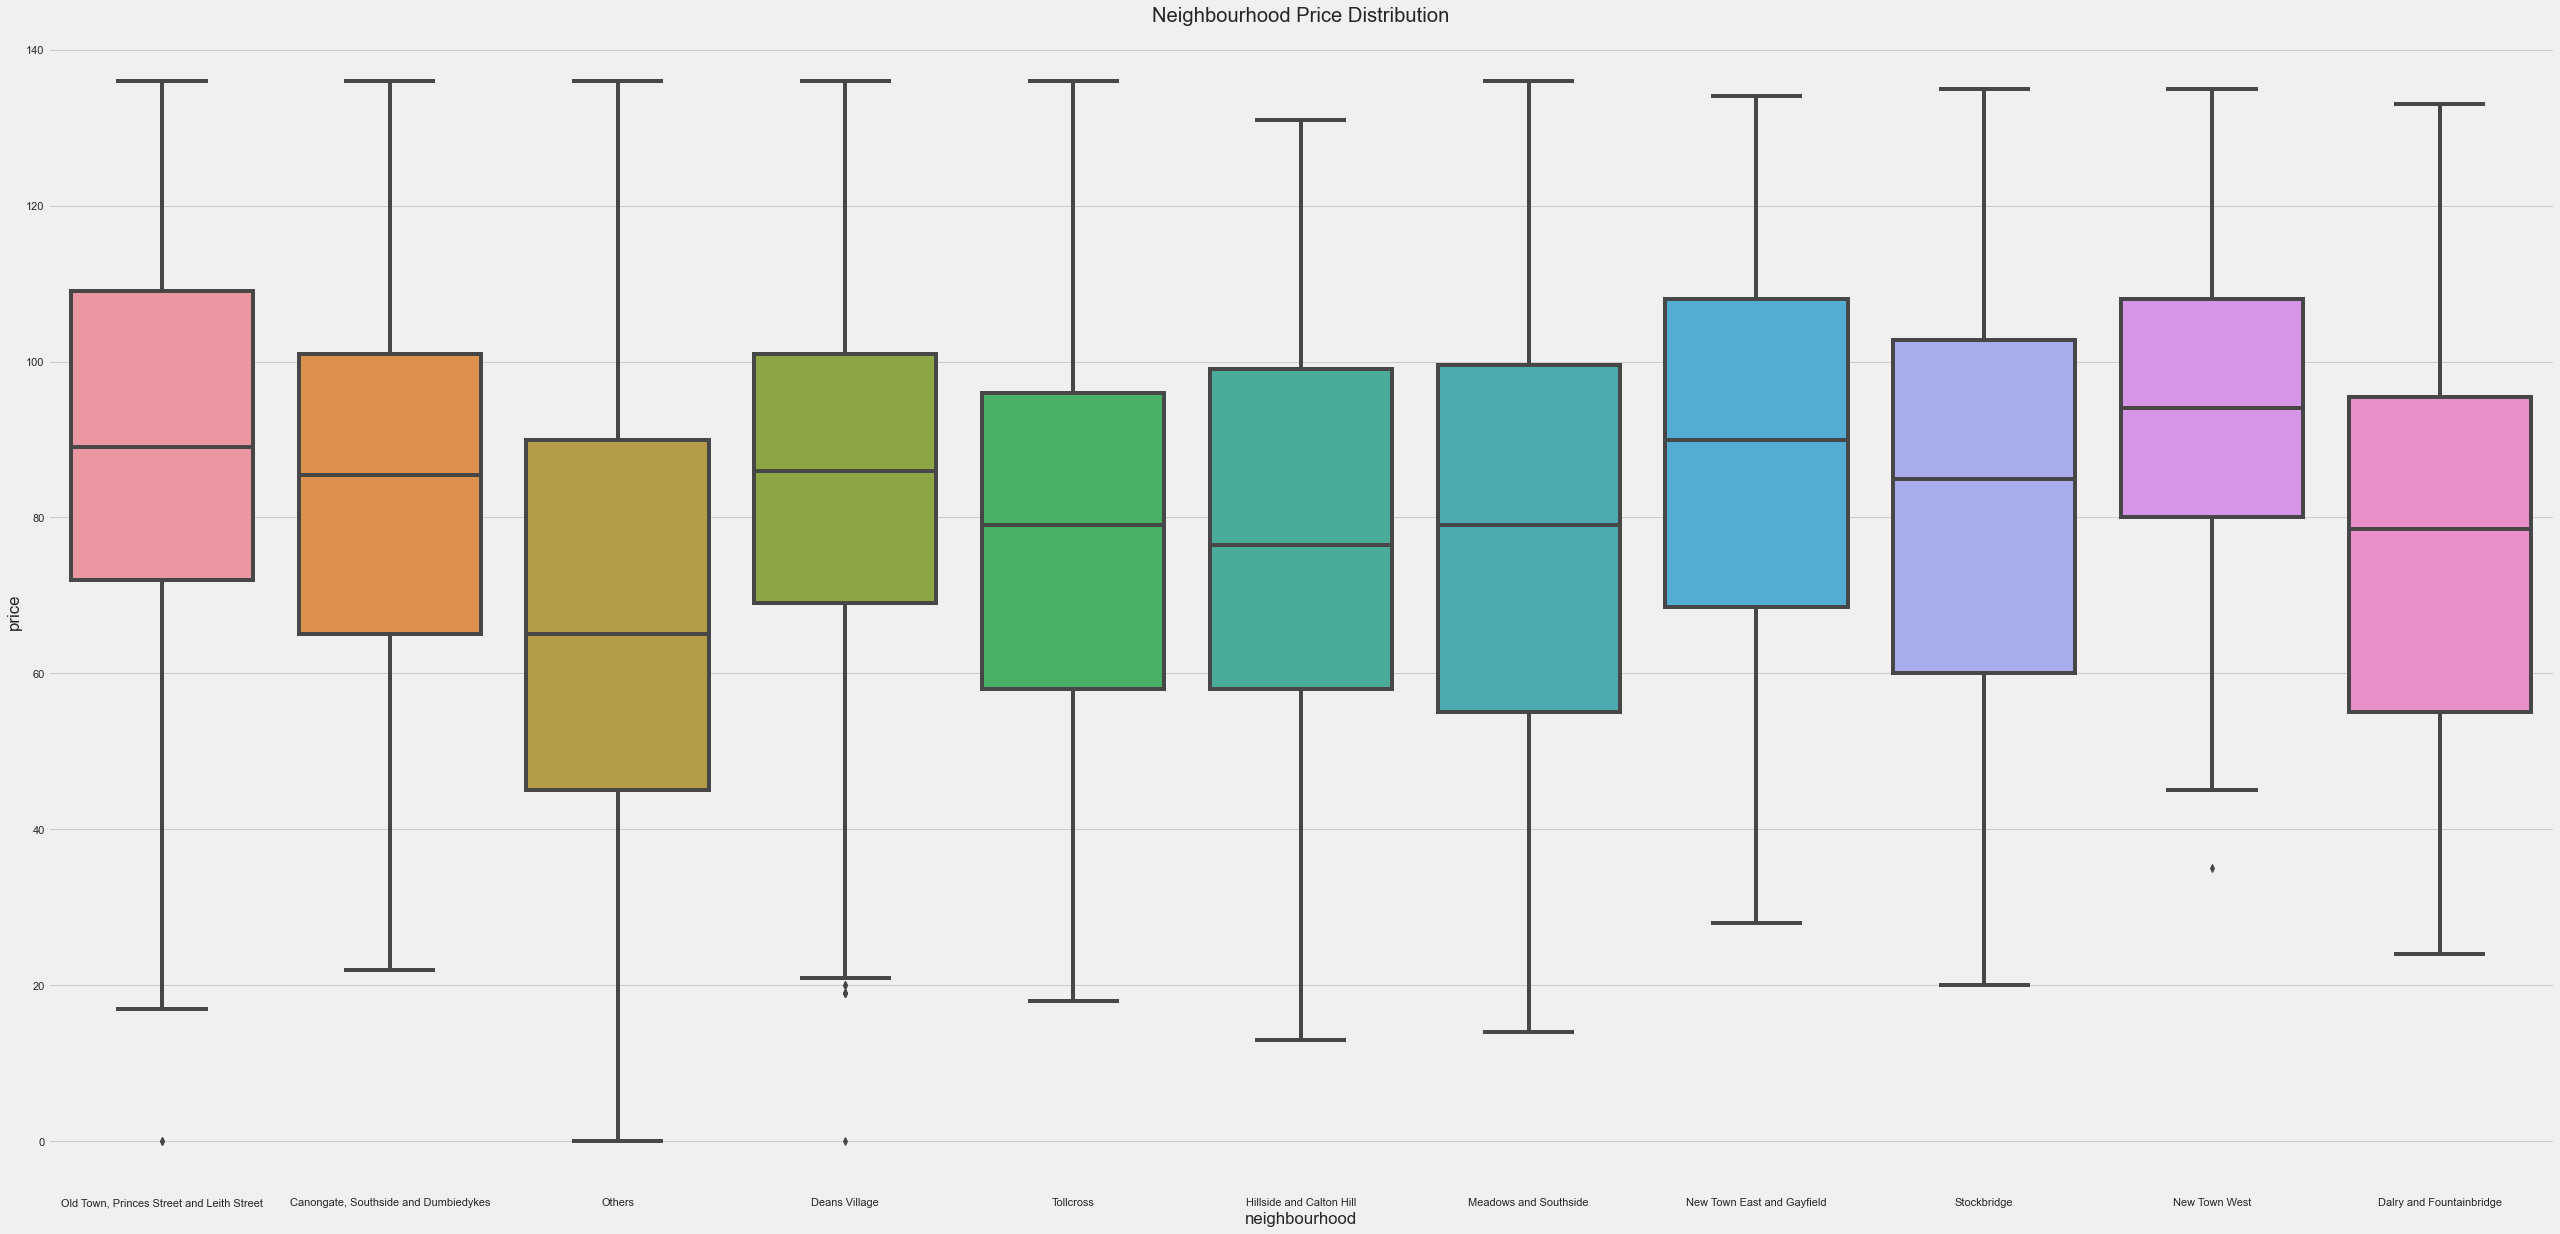

In [30]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(40,20))
sns.boxplot(y='price',x='neighbourhood',data = pricesIQR)
plt.title('Neighbourhood Price Distribution')
plt.show()

## Top Listing Words

In [31]:
#Create empty list where we are going to put the name strings
names=[]
#Getting name string from 'name' column and appending it to the empty list
for name in df2.name:
    names.append(name)
#Setting a function to split name strings into seperate words
def split_name(name):
    s = str(name).split()
    return s
#Create empty list where we are going to count the words
names_count = []
#Getting name string to appending it to the names_count list
for n in names:
    for word in split_name(n):
        word = word.lower()
        names_count.append(word)

In [32]:
from collections import Counter
top_25 = Counter(names_count).most_common()
top_25 = top_25[:25]

[Text(0, 0, 'in'),
 Text(1, 0, 'apartment'),
 Text(2, 0, 'flat'),
 Text(3, 0, 'room'),
 Text(4, 0, 'edinburgh'),
 Text(5, 0, 'city'),
 Text(6, 0, 'the'),
 Text(7, 0, 'bedroom'),
 Text(8, 0, 'with'),
 Text(9, 0, '-'),
 Text(10, 0, 'centre'),
 Text(11, 0, 'double'),
 Text(12, 0, 'central'),
 Text(13, 0, 'bed'),
 Text(14, 0, '2'),
 Text(15, 0, 'parking'),
 Text(16, 0, 'to'),
 Text(17, 0, '&'),
 Text(18, 0, 'spacious'),
 Text(19, 0, 'town'),
 Text(20, 0, 'and'),
 Text(21, 0, 'bright'),
 Text(22, 0, 'of'),
 Text(23, 0, 'private'),
 Text(24, 0, 'modern')]

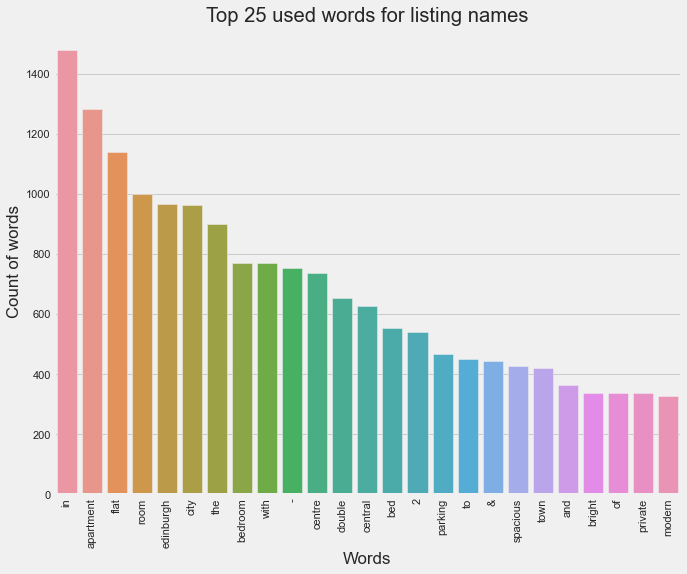

In [33]:
word_count_data = pd.DataFrame(top_25)
word_count_data.rename(columns={0:'Words',1:'Counts'},inplace=True)
viz_count = sns.barplot(x='Words',y='Counts', data = word_count_data)
viz_count.set_title('Top 25 used words for listing names')
viz_count.set_ylabel('Count of words')
viz_count.set_xlabel('Words')
viz_count.set_xticklabels(viz_count.get_xticklabels(),rotation = 90)

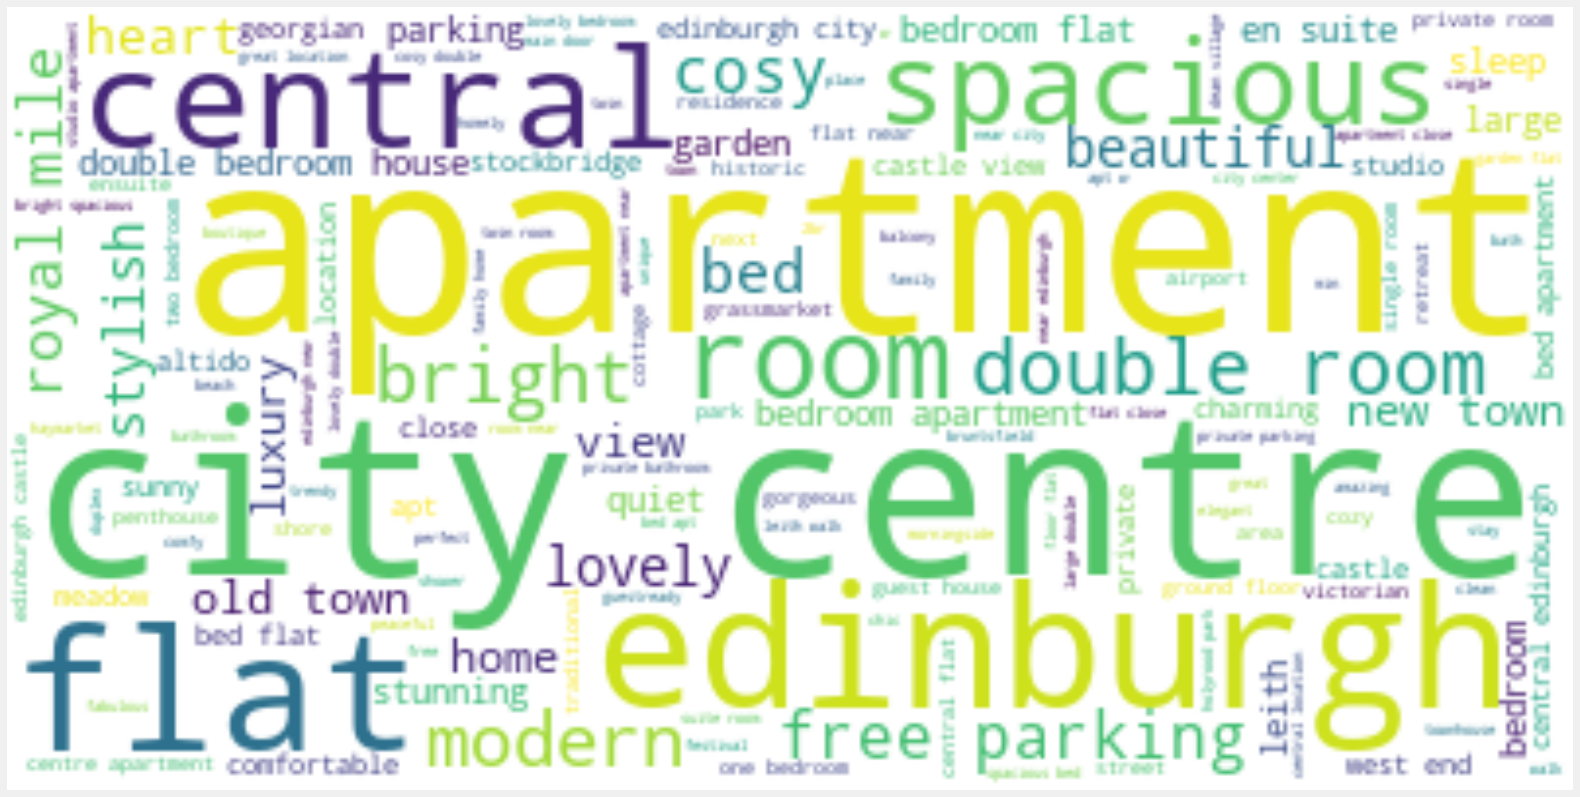

In [36]:
from wordcloud import WordCloud, ImageColorGenerator
text = ' '.join(str(n).lower() for n in df2.name)
#Generate wordcloud image
wordcloud = WordCloud(max_words=200, background_color = 'white').generate(text)
plt.figure(figsize=(25,20))
#Display the image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Most Reviewed Listings

In [41]:
df2.nlargest(10, 'number_of_reviews')

,name,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
202,Super King room in the heart of town,257536681,"Old Town, Princes Street and Leith Street",55.95456,-3.18601,Private room,47,1,865,8.19,2,279,56
153,Classical Apartment on the Royal Mile,1366276,"Old Town, Princes Street and Leith Street",55.94927,-3.19407,Entire home/apt,147,3,849,7.76,2,186,102
203,Cozy double room in the heart of Edinburgh,257536681,"Old Town, Princes Street and Leith Street",55.95448,-3.18603,Private room,43,1,845,7.98,2,209,63
414,"Bright, stylish room in city centre - free par...",19124099,Hillside and Calton Hill,55.95951,-3.16998,Private room,49,1,814,8.96,1,68,38
639,"Clean & comfortable, spacious & central",33909344,Others,55.95763,-3.19615,Entire home/apt,70,2,767,9.40,3,1,95
516,Royal Mile Retreat!,22445250,"Old Town, Princes Street and Leith Street",55.94970,-3.18582,Entire home/apt,89,1,749,8.66,1,236,72
13,Explore the Royal Mile from a City View Apartment,615381,Others,55.95851,-3.17078,Entire home/apt,76,4,738,5.79,2,259,60
194,Central apartment with castle view,6687814,"Old Town, Princes Street and Leith Street",55.94644,-3.19969,Entire home/apt,78,2,732,6.86,2,172,97
880,"Lovely Double Room quiet, central",33909344,Stockbridge,55.95491,-3.21351,Private room,40,2,732,9.26,3,0,105
525,Studio Apartment with Castle View,25316365,Tollcross,55.94617,-3.20022,Entire home/apt,78,2,714,8.18,2,162,111


In [44]:
df2.room_type.value_counts(normalize=True)

Entire home/apt    0.687875
Private room       0.293134
Hotel room         0.015095
Shared room        0.003895
Name: room_type, dtype: float64

In [45]:
df2.price[:16]

0       90
1       95
2       52
3       37
4      164
5      145
6      176
7      115
8       77
9       55
10      75
11     305
12      99
13      76
14     180
15    1500
Name: price, dtype: int64

## Average price of each room type

In [46]:
df2[['room_type','price']].groupby('room_type')\
  .agg(['mean','count'])\
    .sort_values(by=('price','count'), ascending=False).round(2)

price      
                   mean count
room_type                    
Entire home/apt  168.26  4238
Private room      97.34  1806
Hotel room       256.84    93
Shared room       21.12    24

## Analyze the listings based on the location

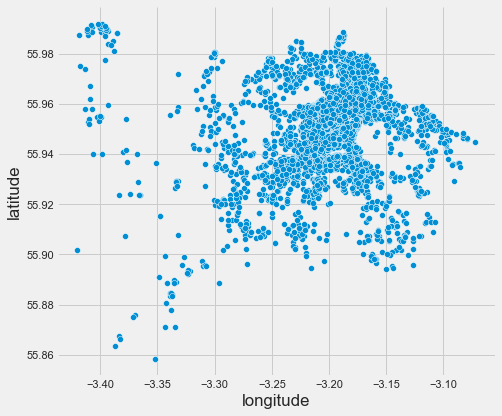

In [47]:
sns.relplot(x='longitude', y='latitude', data=df2,   
            kind='scatter', height=6, aspect=1.2)

## Different room types are indicated with different colors on the map

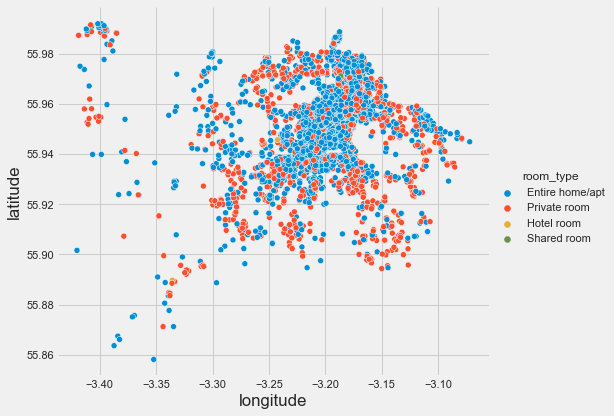

In [49]:
sns.relplot(x='longitude', y='latitude', data=df2,   
            kind='scatter', hue='room_type',
            height=6, aspect=1.2)

In [50]:
df2.room_type.unique()

array(['Entire home/apt', 'Private room', 'Hotel room', 'Shared room'],
      dtype=object)

## Listings Density using Folium heat map

In [53]:
import pandas as pd
import folium
from folium.plugins import HeatMap
map_folium = folium.Map([1.35255,103.82580],zoom_start=11.4)
HeatMap(df2[['latitude','longitude']].dropna(),radius=8,gradient={0.2:'blue',0.4:'purple',0.6:'orange',1.0:'red'}).add_to(map_folium)
display(map_folium)